In [ ]:
# Tái sử dụng logic trong nhiều Component

1. Custom Hook 
  + Khi thấy logic trong Component lặp
  + Là cách hiện đại & dễ dùng nhất

2. Render Props
3. HOC - Higher Order Component

# Render Props

In [ ]:
//src/pages/RenderProps/index.jsx\

/* Bài toán: Tái sử dụng Logic trong Component này */
import React, { useState } from "react";

function RenderProps() {
    const [count, setCount] = useState(0);

    return (
        <div>
            <h1 onClick={() => setCount(count + 1)}>Count is {count}</h1>
        </div>
    );
}

export default RenderProps;


In [ ]:
import React, { useState } from "react";

/* Cách 1: Custom Hook */
function useCounter(initialState = 0) {
    const [count, setCount] = useState(initialState);
    const handleIncrease = () => setCount(count + 1);
    return [count, handleIncrease];
}

function RenderProps() {
    const [count, handleIncrease] = useCounter(0);

    /* Đã giấu hoàn toàn được logic */
    return (
        <div>
            <h1 onClick={handleIncrease}>Count is {count}</h1>
        </div>
    );
}

export default RenderProps;


In [ ]:
import React, { useState } from "react";

/* Cách 2: Render Props:
    - Tư duy: Tạo ra Component
    - Bước 1: Truyền state qua props
    - Bước 2: Dùng Comp đó với cặp thẻ mở/đóng để lấy được props children
        + Children này nhận một hàm
*/

function Counter({ initialState = 0, children }) {
    // Bước 1:
    const [count, setCount] = useState(initialState);
    const handleIncrease = () => setCount(count + 1);

    /* Bước 3: Gọi children để render JSX */
    return children(handleIncrease, count);
}

function RenderProps() {
    return (
        <div>
            <Counter initialState={10}>
                {/* Bước 2: Hàm thực hiện logic đó và render JSX
                    - Vì children cũng là một props, 
                    - Truyền props vào tham số của hàm luôn
                */}
                {(handleIncrease, count) => (
                    <h1 onClick={handleIncrease}>Count is {count}</h1>
                )}
            </Counter>
        </div>
    );
}

export default RenderProps;


# Nỗi đau: Giao diện bị "fix cứng"
- Bối cảnh: Bạn viết một Component tên là `MouseTracker`.
- Nó lắng nghe sự kiện di chuột và cập nhật state `x, y`
- BÊN TRONG Component, render JSX -> hiển thị toạ độ đó

In [ ]:
// MouseTracker.js
const MouseTracker = () => {
  const [position, setPosition] = useState({ x: 0, y: 0 });

  const handleMouseMove = (event) => {
    setPosition({ x: event.clientX, y: event.clientY });
  };

  return (
    <div onMouseMove={handleMouseMove} style={{ height: '100vh' }}>
      {/* VẤN ĐỀ NẰM Ở ĐÂY: Giao diện bị "cứng" */}
      <p>Chuột đang ở: {position.x}, {position.y}</p>
    </div>
  );
};

In [ ]:


# Nỗi đau xuất hiện khi:
  + Ở page A, mình muốn hiển thị dạng bình thường:
    `<p>Chuột đang ở: {position.x}, {position.y}</p>`
  + Nhưng ở page B, anh muốn hiển thị một giao diện khác vẫn với toạ độ x, y (cụ thể là một hình con mèo chạy theo con chuột)
  + Lúc này Ở page khi gọi Component: <MouseTracker/>
  + Rõ ràng là giao diện đã được đóng gói trong Component con <MouseTracker/> nên muốn sửa thì phải vào trong Component đó sửa

# Bạn sẽ làm gì?
- Cách dở: Copy Component `MouseTracker` ra đổi tên thành `CatTracker`, sửa JSX đoạn <p>..</p> thành <img>..</img>
  > Rõ ràng logic bị lặp, khó bảo trì

- Cách dùng Props thông thường:
  > Thêm một props `showCat={true}` => <MouseTracker showCat={true}/>

    ```JSX
    {showCat ? <img ... /> : <p>...</p>}
    ```

  > Vậy nếu muốn 10 kiểu dáng khác nhau (VD: showDog, showBird)
  > Component bị `if/else` kinh khủng

# Kết luận nỗi đau:
- Bạn có **Logic** (theo dõi chuột) giống nhau
- Nhưng Giao diện (render cái gì) lại khác nhau
- Props thông thường 
  + chỉ truyền được dữ liệu (màu sắc, thuộc tính, text đơn thuần)
  + ❌ Không linh hoạt trong việc thay đổi JSX, cấu trúc render

In [ ]:
# Giải pháp: Render Props xuất hiện (Giao quyền render lại cho cha)
- Render Props
- DÙng props `children` như một `function` để có thể truyền `state`, `login` và `return` ra `JSX`
- Nói với Component con rằng:
  > Này `MouseTracker`, tao không cần mày quyết định sẽ render ra cái gì?
  > Mày chỉ cần lo việc tính toán toạ độ (x, y) thôi
  > Sau đó **gọi hàm children** và truyền toạ độ đó cho tạo, tao sẽ tự render
=> Đảo ngược quyền kiểm soát


# Cú pháp
- Thay vì truyền một element con tĩnh (`<div>...</div>`), ta truyền một `hàm`

In [ ]:
// 1. Component Logic (MouseTracker)
const MouseTracker = ({ children }) => {
  const [position, setPosition] = useState({ x: 0, y: 0 });

  const handleMouseMove = (event) => {
    setPosition({ x: event.clientX, y: event.clientY });
  };

  return (
    <div onMouseMove={handleMouseMove} style={{ height: '100vh' }}>
      {/* Thay vì render <p>, ta GỌI hàm children và đưa state ra ngoài */}
      {children(position)}
    </div>
  );
};

In [ ]:
# Cách sử dụng

// Trường hợp 1: Hiển thị text
<MouseTracker>
  {(pos) => <p>Toạ độ: {pos.x}, {pos.y}</p>}
</MouseTracker>

// Trường hợp 2: Hiển thị con mèo (Tái sử dụng logic, UI khác hoàn toàn)
<MouseTracker>
  {(pos) => <img src="cat.png" style={{ left: pos.x, top: pos.y, position: 'absolute' }} />}
</MouseTracker>

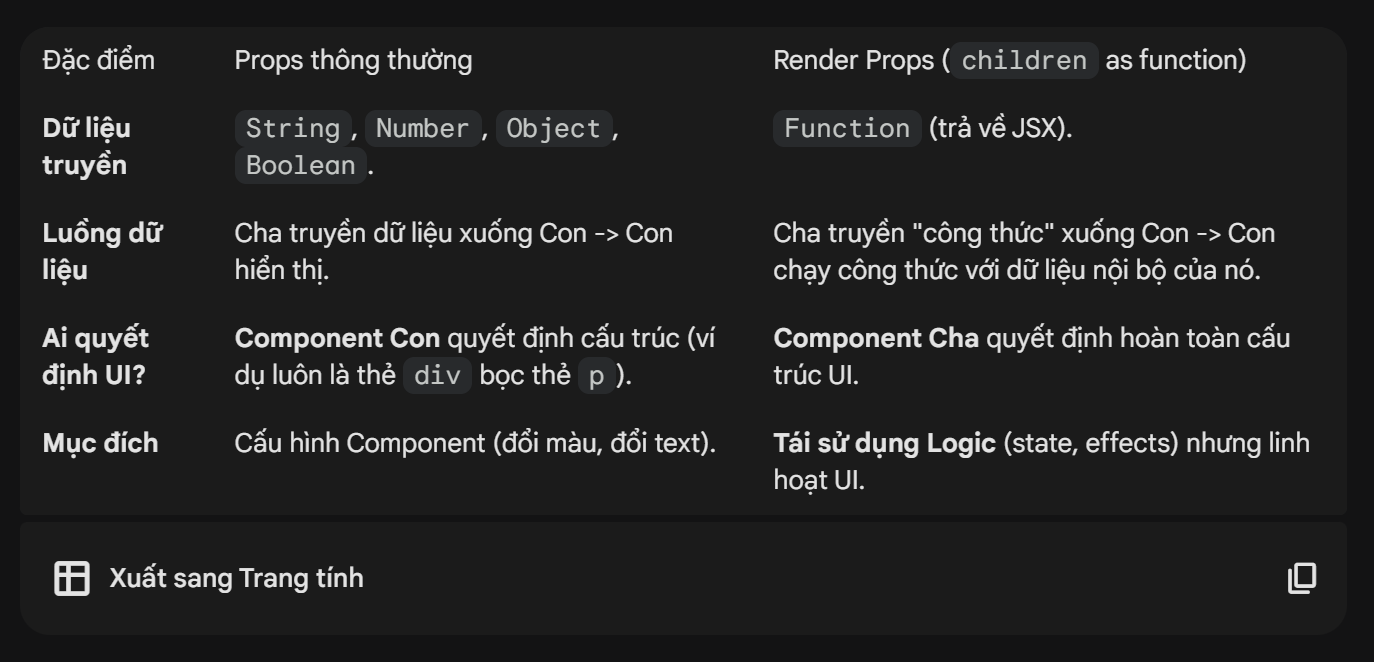

In [ ]:
# Tóm tắt NỖI ĐAU & THUỐC GIẢI
- Nỗi đau:
  + Bạn muốn dùng lại Logic
  + Nhưng mỗi nơi lại cần Giao diện khác nhau
=> `Render Props` giúp tách biệt hoàn toàn Hành vi ra khỏi Giao diện

In [ ]:
/* Custom hook: Chỉ lấy lấy dữ liệu như kiểu khai báo! */

const App = () => {
  // Gọi logic chỉ bằng 1 dòng, giống như khai báo biến
  const { x, y } = useMousePosition(); 

  return (
    <div style={{ height: '100vh' }}>
      <h1>Demo Hooks</h1>

      {/* Yêu cầu 1: Hiển thị Text */}
      <p>Toạ độ hiện tại: {x}, {y}</p>

      {/* Yêu cầu 2: Hiển thị Mèo */}
      <img 
        src="cat.png" 
        style={{ position: 'absolute', left: x, top: y, width: 50 }} 
      />
    </div>
  );
};